# WHH fitting

using Kim et al (2025) equation on page6.

$T/T_c$ - $H_{c2}(T)/H_{c2}^{orb}$ plot

## hbar
Kim et al. 2025, $\hbar = (4/\pi^2)[H_{c2}/|dH_{c2}(T)/dT|_{T_c}]$  
instead, using $\hbar = (4/\pi^2)[H_{c2}/|dH_{c2}(T)/dt|_{t=1}] = (4/\pi^2)[H_{c2}/(T_c\cdot|dH_{c2}(T)/dT|_{T_c})]$ where $t=T/T_c$ following Werthamer et al 1966

## reference
1. Kim, S. et al. Spin-orbit coupling induced enhancement of upper critical field in superconducting A15 single crystals. Journal of Alloys and Compounds 1037, 182350 (2025).
2. Werthamer, N. R., Helfand, E. & Hohenberg, P. C. Temperature and Purity Dependence of the Superconducting Critical Field, H c 2 . III. Electron Spin and Spin-Orbit Effects. Phys. Rev. 147, 295–302 (1966).



In [1]:
from scipy.optimize import least_squares, shgo
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import whh

In [44]:
fig5df = pd.read_csv("fig5_flatten.csv")
fig5df

,sample,T/Tc,H/H_orb,s1_slope,s1_maki,s1_H_orb,s1_T_c
0,TS1,0.92960,0.08267,1.29,0.68,5.22,5.4
1,TS1,0.83534,0.18046,1.29,0.68,5.22,5.4
2,TS1,0.74350,0.33166,1.29,0.68,5.22,5.4
3,TS1,0.65126,0.43411,1.29,0.68,5.22,5.4
4,TS1,0.55701,0.53510,1.29,0.68,5.22,5.4
5,TS1,0.46477,0.61800,1.29,0.68,5.22,5.4
6,TS1,0.37293,0.71578,1.29,0.68,5.22,5.4
7,TS1,0.25169,0.77445,1.29,0.68,5.22,5.4
8,TS1,0.17314,0.80860,1.29,0.68,5.22,5.4
9,TS1,0.13931,0.81503,1.29,0.68,5.22,5.4


# preview digitized data

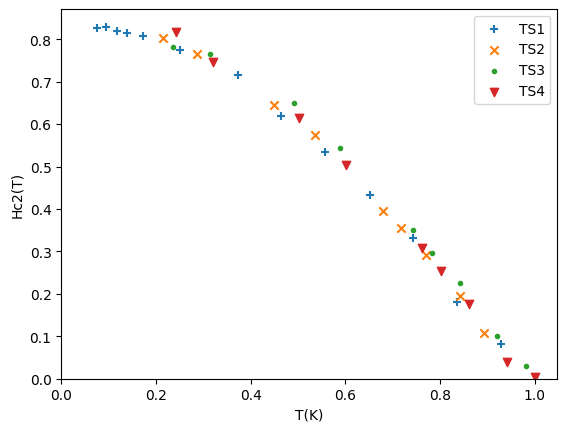

In [45]:
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Figrure5 data, Fit $\alpha$, $\lambda_{so}$ Ignore $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$ on Table S1
* slope $|dH_{c2}/dt|_{t=1}=1.4$
* H_orb $H_{orb}=5.1$
* T_c is not clearly given on the paper.
    * $t_c=5.28$, from $H^{orb}_{c2}(0)=-0.69|dH_{c2}/dT|_{T_c}=-0.69T_c|dH_{c2}/dt|_{t=1}$
    * average of 4 samples $T_c$ is 5.25
    * **when $T_c=5.13$, maki parameter becomes ~0.60**

In [49]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
#slope=fig5df['s1_slope'].to_numpy()
slope=np.array([1.4]*len(t))

#field_orb=fig5df['s1_H_orb'].to_numpy()
field_orb=np.array([5.1]*len(t))

#t_c=fig5df['s1_T_c'].to_numpy()
t_c=np.array([5.28]*len(t))


ms=(t, t_c, slope, field_norm, field_orb)
#%%
xs0=[0.6, 0.1]
res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x:{res_lsq.x}")

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         6.8109e-01                                    3.61e+01    
       1              2         4.4125e-02      6.37e-01       1.49e-01       2.10e+00    
       2              3         3.3027e-02      1.11e-02       1.20e-01       1.19e+00    
       3              4         3.2255e-02      7.72e-04       3.09e-03       4.15e-02    
       4              5         3.2011e-02      2.44e-04       3.29e-03       1.86e-02    
       5              6         3.2006e-02      5.72e-06       2.92e-04       1.62e-03    
       6              7         3.2005e-02      3.30e-07       2.88e-05       3.06e-05    
       7              8         3.2005e-02      1.34e-11       5.02e-07       1.29e-06    
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 6.8109e-01, final cost 3.2005e-02, first-order optimality 1.29e-06.
res_lsq.x:[6.69195493e-01 6.85923

In [ ]:
#%% plot from equation; y0=[0.6]
x=t.copy()
x.sort()
len_x=len(x)

field_orb=5.1
y0=[0.6]
t_c=5.28

alpha=0.0
l_so=0.0
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#fit_params = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]


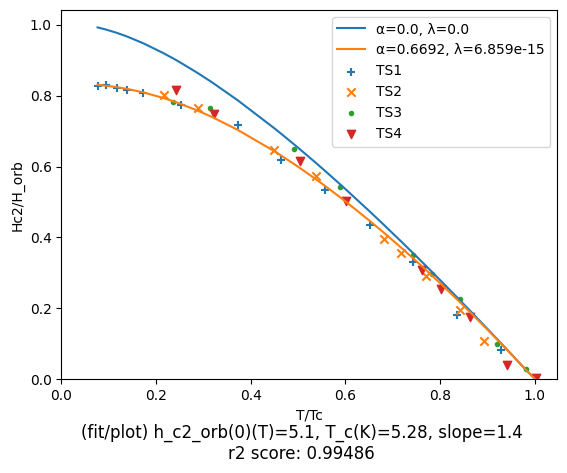

In [60]:

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:0.4}, λ={res_lsq.x[1]:0.4}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
plt.figtext(0.5, -0.05, f"(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.28, slope=1.4\nr2 score: {r2_score(fit_params, fig5df_sorted["H/H_orb"].to_numpy()):0.5}", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## By Samples, from supplements

In [2]:
supple_df = pd.read_csv("fig5_digitized_supple.csv")
supple_df

,T_c,T(K),Hc2(T),Slope(T/K),slope_error,Hc2_orb,sample
0,5.4,0.37165,4.33058,1.29,0.17,5.22,TS1
1,5.4,0.47988,4.33058,1.29,0.17,5.22,TS1
2,5.4,0.58812,4.28378,1.29,0.17,5.22,TS1
3,5.4,0.72281,4.26038,1.29,0.17,5.22,TS1
4,5.4,0.92244,4.21358,1.29,0.17,5.22,TS1
5,5.4,1.33854,4.05813,1.29,0.17,5.22,TS1
6,5.4,1.99035,3.72717,1.29,0.17,5.22,TS1
7,5.4,2.49785,3.25914,1.29,0.17,5.22,TS1
8,5.4,2.99813,2.79446,1.29,0.17,5.22,TS1
9,5.4,3.48879,2.25623,1.29,0.17,5.22,TS1


### Fit 'Slope'

In [28]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]

for sample_df in sample_dfs:
    T=sample_df['T(K)'].to_numpy()
    field=sample_df['Hc2(T)'].to_numpy()
    sample_name = sample_df['sample'].to_list()
    slope=sample_df['Slope(T/K)'].to_numpy()
    slope_error=sample_df['slope_error'].to_numpy()

    field_orb=sample_df['Hc2_orb'].to_numpy()
    t_c=sample_df['T_c'].to_numpy()
    t = T/t_c
    field_norm=field/field_orb

    ms=(t, t_c, field)
    #ms=(t, t_c, slope, field)
    #%%
    xs0=[0.6, 1e-8, 1.0]
    res_lsq=least_squares(whh.residual_exp_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0, -np.inf), (5.0, 5.0, np.inf)), verbose=1)
    #res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
    print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}, slope: {res_lsq.x[2]}")

`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 3.2787e+01, final cost 3.1976e-03, first-order optimality 7.59e-07.
sample: TS1. maki_param: 0.6285727818573768, lambda_so: 1.6539599540208617e-17, slope: 1.374051856088978
`ftol` termination condition is satisfied.
Function evaluations 10, initial cost 2.3978e+00, final cost 6.2832e-04, first-order optimality 2.58e-08.
sample: TS2. maki_param: 0.6855332128540407, lambda_so: 1.096745914006975e-17, slope: 1.4469201251622432
`ftol` termination condition is satisfied.
Function evaluations 12, initial cost 1.8412e+00, final cost 1.3824e-03, first-order optimality 2.54e-07.
sample: TS3. maki_param: 0.9789889115733782, lambda_so: 1.7362029918999348e-20, slope: 1.5990363210212732
`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 1.8587e+00, final cost 1.6302e-03, first-order optimality 1.01e-07.
sample: TS4. maki_param: 0.4547586648508323, lambda_so: 0.21136319628342026, slope: 1.33

### Fit 'Slope', bound to the range on Table S1

In [27]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]

for sample_df in sample_dfs:
    T=sample_df['T(K)'].to_numpy()
    field=sample_df['Hc2(T)'].to_numpy()
    sample_name = sample_df['sample'].to_list()
    slope=sample_df['Slope(T/K)'].to_numpy()
    slope_error=sample_df['slope_error'].to_numpy()

    field_orb=sample_df['Hc2_orb'].to_numpy()
    t_c=sample_df['T_c'].to_numpy()
    t = T/t_c
    field_norm=field/field_orb

    ms=(t, t_c, field)
    #ms=(t, t_c, slope, field)
    #%%
    xs0=[0.6, 1e-8, slope[0]]
    res_lsq=least_squares(whh.residual_exp_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0, slope[0]-slope_error[0]), (5.0, 5.0, slope[0]+slope_error[0])), verbose=1)
    #res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
    print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}, slope: {res_lsq.x[2]}")

`ftol` termination condition is satisfied.
Function evaluations 16, initial cost 7.0453e-01, final cost 3.1976e-03, first-order optimality 1.48e-06.
sample: TS1. maki_param: 0.6285728094260101, lambda_so: 4.347451736530224e-13, slope: 1.374051873438646
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 11, initial cost 2.4572e-02, final cost 9.6904e-04, first-order optimality 2.82e-08.
sample: TS2. maki_param: 0.5907599083294414, lambda_so: 5.599067527698033e-17, slope: 1.4
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 9, initial cost 2.4773e-02, final cost 5.2608e-03, first-order optimality 3.07e-09.
sample: TS3. maki_param: 0.6192326757496934, lambda_so: 7.871042571354912e-22, slope: 1.4
`ftol` termination condition is satisfied.
Function evaluations 20, initial cost 1.3663e-01, final cost 1.6302e-03, first-order optimality 1.36e-08.
sample: TS4. maki_param: 0.45486477035842404, lambda_so: 0.21165119103190144, slope: 

### TS4 with slope=1.4

In [23]:
samples=['TS1', 'TS2', 'TS3', 'TS4']

sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
sample_df=sample_dfs[3]
T=sample_df['T(K)'].to_numpy()
field=sample_df['Hc2(T)'].to_numpy()
sample_name = sample_df['sample'].to_list()
slope=np.array([1.4]*len(T))
slope_error=sample_df['slope_error'].to_numpy()

field_orb=sample_df['Hc2_orb'].to_numpy()
t_c=sample_df['T_c'].to_numpy()
t = T/t_c
field_norm=field/field_orb

ms=(t, t_c, slope, field)
#ms=(t, t_c, slope, field)
#%%
xs0=[0.6, 1e-8]
#res_lsq=least_squares(whh.residual_exp_raw_slopefit, xs0, args=ms, gtol=None, bounds=((0.0,0.0), (5.0, 5.0)), verbose=1)
res_lsq=least_squares(whh.residual_exp_raw, xs0, args=ms, bounds=((0.0,0.0), (5.0, 1e-7)), gtol=None, ftol=1e-12, verbose=1)
print(f"sample: {sample_name[0]}. maki_param: {res_lsq.x[0]}, lambda_so: {res_lsq.x[1]}")

`xtol` termination condition is satisfied.
Function evaluations 6, initial cost 3.5328e-03, final cost 2.3588e-03, first-order optimality 3.11e-09.
sample: TS4. maki_param: 0.5666847331496164, lambda_so: 9.999998813762002e-08


## Fit $\alpha$, $\lambda_{so}$ using $H_{orb}$, $T_c$, $|dH_{c2}/dT|_{T_c}$ on Table S1

In [ ]:
t=fig5df['T/Tc'].to_numpy()
field_norm=fig5df['H/H_orb'].to_numpy()
slope=fig5df['s1_slope'].to_numpy()
#slope=np.array([1.4]*len(t))

field_orb=fig5df['s1_H_orb'].to_numpy()
#field_orb=np.array([5.1]*len(t))

t_c=fig5df['s1_T_c'].to_numpy()
#t_c=np.array([5.279503105590062]*len(t))


ms=(t, t_c, slope, field_norm, field_orb)
#%%
xs0=[0.6, 0.1]
res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x:{res_lsq.x}")

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0264e-01                                    1.34e+01    
       1              2         9.7684e-02      2.05e-01       9.99e-02       1.50e+00    
       2              3         8.6092e-02      1.16e-02       1.04e-01       5.80e-02    
       3              4         8.0228e-02      5.86e-03       1.18e-01       3.01e-01    
       4              5         7.9884e-02      3.44e-04       2.70e-03       3.10e-02    
       5              6         7.9668e-02      2.16e-04       3.41e-03       1.30e-02    
       6              7         7.9658e-02      1.07e-05       4.51e-04       1.48e-03    
       7              8         7.9657e-02      5.83e-07       5.64e-05       3.32e-05    
       8              9         7.9657e-02      4.51e-11       1.20e-06       4.83e-06    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 3.0264e-01

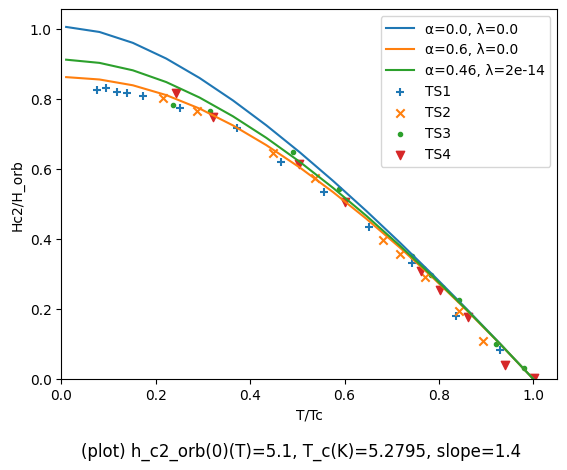

In [ ]:
#%% plot from equation; y0=[0.6]
len_x=15
x=np.linspace(0.01, 1.0, len_x)

field_orb=5.1
y0=[0.6]
t_c=5.279503105590062

alpha=0.6
l_so=0.0
slope=1.4
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0_6lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0_6lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=0.0
l_so=0.0
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#fit_params = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, alpha0_6lso0, label="α=0.6, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:.02}, λ={res_lsq.x[1]:.02}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
plt.figtext(0.5, -0.05, "(plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Nomralize on Table S1, Fit & Plot with Settled Params.

In [9]:
supple_df = pd.read_csv("fig5_digitized_supple.csv")
supple_df

,T_c,T(K),Hc2(T),Slope(T/K),Hc2_orb,sample
0,5.4,0.37165,4.33058,1.29,5.22,TS1
1,5.4,0.47988,4.33058,1.29,5.22,TS1
2,5.4,0.58812,4.28378,1.29,5.22,TS1
3,5.4,0.72281,4.26038,1.29,5.22,TS1
4,5.4,0.92244,4.21358,1.29,5.22,TS1
5,5.4,1.33854,4.05813,1.29,5.22,TS1
6,5.4,1.99035,3.72717,1.29,5.22,TS1
7,5.4,2.49785,3.25914,1.29,5.22,TS1
8,5.4,2.99813,2.79446,1.29,5.22,TS1
9,5.4,3.48879,2.25623,1.29,5.22,TS1


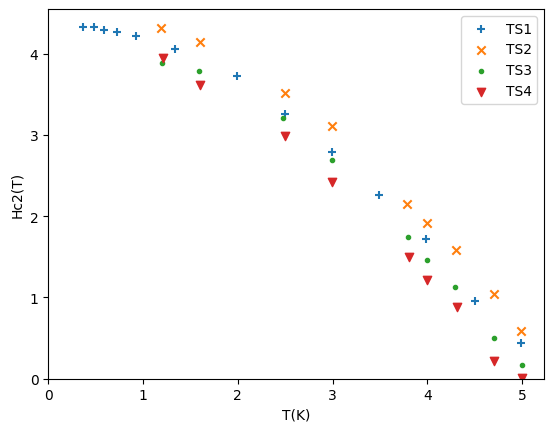

In [10]:
# Preview digitized
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T(K)"].to_numpy(), sample_df["Hc2(T)"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

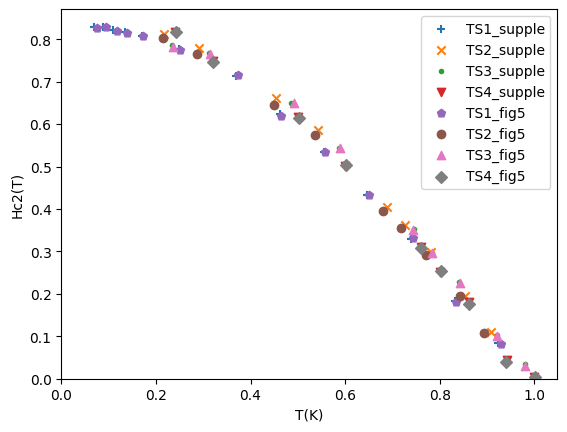

In [11]:
# preview normalized on S1

from matplotlib.lines import Line2D

# Preview digitized
fig, ax = plt.subplots()

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[supple_df[supple_df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T(K)"].to_numpy()/sample_df["T_c"].to_numpy(), sample_df["Hc2(T)"].to_numpy()/sample_df["Hc2_orb"].to_numpy(), label=sample+"_supple", marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

##marker formatting
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['p','o','^','D']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample+"_fig5", marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]
ax.set(xlabel='T(K)', ylabel='Hc2(T)')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
#plt.figtext(0.5, -0.05, "(fit/plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [14]:
t_c_s1=supple_df['T_c'].to_numpy()
T=supple_df['T(K)'].to_numpy()
h_c2=supple_df['Hc2(T)'].to_numpy()
slope=supple_df['Slope(T/K)'].to_numpy()
h_orb=supple_df['Hc2_orb'].to_numpy()

# normalize measured data
t=T/t_c_s1
h_norm=h_c2/h_orb


In [17]:
# settled params
field_orb=np.array([5.1]*len(t))
t_c=np.array([5.279503105590062]*len(t))
slope=np.array([1.4]*len(t))


ms=(t, t_c, slope, h_norm, field_orb)
#%%
xs0=[0.6, 0.1]
#res_lsq=least_squares(whh.residual_exp, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), verbose=2)
#res_lsq=least_squares(whh.residual, xs0, args=ms, bounds=((0.0,0.0), (5.0, 5.0)), gtol=None, ftol=1e-12, verbose=2)
print(f"res_lsq.x (alphs, lambda_so): {res_lsq.x}")

res_lsq.x (alphs, lambda_so): [6.66832443e-01 8.09546271e-15]


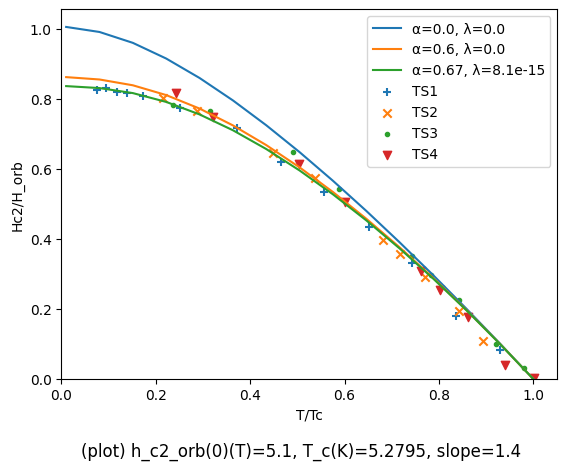

In [16]:
#%% plot from equation; y0=[0.6]
len_x=15
x=np.linspace(0.01, 1.0, len_x)

field_orb=5.1
y0=[0.6]
t_c=5.279503105590062

alpha=0.6
l_so=0.0
slope=1.4
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0_6lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0_6lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=0.0
l_so=0.0
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

alpha0lso0 = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#alpha0lso0 = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

alpha=res_lsq.x[0]
l_so=res_lsq.x[1]
plot_inps=pd.DataFrame(x, columns=["T"])
plot_inps["T_c"]=[t_c]*len_x
plot_inps['slope']=[slope]*len_x
plot_inps["alpha"]=[alpha]*len_x
plot_inps['l_so']=[l_so]*len_x
plot_inps['field_orb']=[field_orb]*len_x

fit_params = [least_squares(whh.residual_exp_for_plot, y0, args=inp.to_list(), bounds=(0.0, np.inf)).x for _, inp in plot_inps.iterrows()]
#fit_params = [least_squares(whh.residual, y0, args=inp.to_list(), bounds=(0.0, np.inf), gtol=None, ftol=1e-12).x for _, inp in plot_inps.iterrows()]

fig, ax = plt.subplots()
ax.plot(x, alpha0lso0, label="α=0.0, λ=0.0")
ax.plot(x, alpha0_6lso0, label="α=0.6, λ=0.0")
ax.plot(x, fit_params, label=f"α={res_lsq.x[0]:.02}, λ={res_lsq.x[1]:.02}")

samples=['TS1', 'TS2', 'TS3', 'TS4']
sample_dfs=[fig5df[fig5df['sample']==sample] for sample in samples]
markers=['+','x','.','v']

axes_scatter=[ax.scatter(sample_df["T/Tc"].to_numpy(), sample_df["H/H_orb"].to_numpy(), label=sample, marker=marker) for sample_df, sample, marker in zip(sample_dfs, samples, markers)]

ax.set(xlabel='T/Tc', ylabel='Hc2/H_orb')
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0)
ax.legend()
plt.figtext(0.5, -0.05, "(plot) h_c2_orb(0)(T)=5.1, T_c(K)=5.2795, slope=1.4", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()